# 1. Introduction & Core Concepts

This notebook introduces machine learning concepts using scikit-learn and the ABIDE II neuroimaging dataset.
This notebook is adapted from NeuroHackademy's workshop on machine learning by Ariel Rokem: https://neurohackademy.org/course/introduction-to-machine-learning-4/ . Everything in this notebook is straight from their notebook and slightly modified and reworded to fit the purposes of CompNeuroSociety's workshop.


## Dataset: ABIDE II

The [Autism Brain Imaging Data Exchange (ABIDE)](http://fcon_1000.projects.nitrc.org/indi/abide/) dataset contains structural brain scans from 1,004 subjects. Data includes:
- **Demographics**: age, diagnosis group (1=autism, 2=control), site
- **Brain features**: 1,440 structural features from FreeSurfer (surface area, volume, cortical thickness, local gyrification)

Data structure: $n$ samples × $p$ features matrix, where rows = subjects, columns = features.

In [1]:
# Import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('./data/abide2.tsv', sep='\t')

print("Dataset shape:", data.shape)
data.head()

Dataset shape: (1004, 1446)


,site,subject,age,age_resid,sex,group,fsArea_L_V1_ROI,fsArea_L_MST_ROI,fsArea_L_V6_ROI,fsArea_L_V2_ROI,...,fsCT_R_p47r_ROI,fsCT_R_TGv_ROI,fsCT_R_MBelt_ROI,fsCT_R_LBelt_ROI,fsCT_R_A4_ROI,fsCT_R_STSva_ROI,fsCT_R_TE1m_ROI,fsCT_R_PI_ROI,fsCT_R_a32pr_ROI,fsCT_R_p24_ROI
0,ABIDEII-KKI_1,29293,8.893151,13.642852,2.0,1.0,2750.0,306.0,354.0,2123.0,...,3.362,2.827,2.777,2.526,3.202,3.024,3.354,2.629,2.699,3.179
1,ABIDEII-OHSU_1,28997,12.000000,16.081732,2.0,1.0,2836.0,186.0,354.0,2261.0,...,2.809,3.539,2.944,2.769,3.530,3.079,3.282,2.670,2.746,3.324
2,ABIDEII-GU_1,28845,8.390000,12.866264,1.0,2.0,3394.0,223.0,373.0,2827.0,...,2.435,3.321,2.799,2.388,3.148,3.125,3.116,2.891,2.940,3.232
3,ABIDEII-NYU_1,29210,8.300000,13.698139,1.0,1.0,3382.0,266.0,422.0,2686.0,...,3.349,3.344,2.694,3.030,3.258,2.774,3.383,2.696,3.014,3.264
4,ABIDEII-EMC_1,29894,7.772758,14.772459,2.0,2.0,3080.0,161.0,346.0,2105.0,...,2.428,2.940,2.809,2.607,3.430,2.752,2.645,3.111,3.219,4.128


## Machine Learning: Definition

**Machine learning** builds systems that learn from experience to make predictions. Key characteristics:
- Emphasis on **prediction** over explanation
- Algorithms learn autonomously from data
- Evaluation focuses on quantitative performance

## Supervised vs. Unsupervised Learning

**Supervised learning**: Learn from labeled data (features X + labels y)
- Regression: continuous labels (e.g., predicting age)
- Classification: discrete labels (e.g., diagnosis)

**Unsupervised learning**: Find structure without labels (only features X)
- Clustering: group similar observations
- Dimensionality reduction: reduce feature space

## Scikit-learn Basics

All estimators share a common interface:
1. **Initialize**: `model = Estimator()`
2. **Fit**: `model.fit(X, y)` - train on data
3. **Predict**: `model.predict(X)` - generate predictions
4. **Score**: `model.score(X, y)` - evaluate performance

In [2]:
# Prepare data: brain features as X, age as y
X_all = data.filter(like='fs')
y = data['age'].values

# Sample 5 features for demonstration
N_FEATURES = 5
X = X_all.sample(N_FEATURES, axis=1, random_state=100)

## Example 1: Regression (Predicting Age)

R² score: 0.20


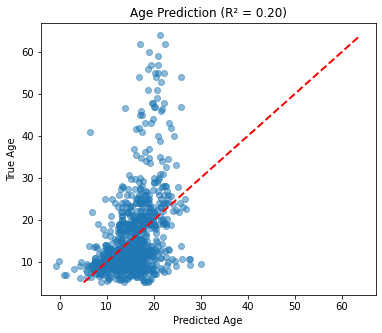

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialize and fit model
model = LinearRegression()
model.fit(X, y)

# Generate predictions
y_pred = model.predict(X)

# Evaluate performance
r2 = r2_score(y, y_pred)
print(f"R² score: {r2:.2f}")

# Visualize predictions vs. true values
plt.figure(figsize=(6, 5))
plt.scatter(y_pred, y, alpha=0.5)
plt.xlabel('Predicted Age')
plt.ylabel('True Age')
plt.title(f'Age Prediction (R² = {r2:.2f})')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.show()

## Example 2: Classification (Autism Diagnosis)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Use diagnosis group as labels
y_class = data['group']

# Initialize and fit classifier
clf = GaussianNB()
clf.fit(X_all, y_class)

# Generate predictions and evaluate
y_pred = clf.predict(X_all)
accuracy = clf.score(X_all, y_class)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_class, y_pred))

## Example 3: Clustering (Finding Subtypes)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

# Select autism subjects only
autism_mask = data['group'] == 1
X_autism = X_all[autism_mask].sample(2, axis=1, random_state=99)

# Standardize features
X_autism_scaled = scale(X_autism)

# Fit k-means with k=4 clusters
K = 4
km = KMeans(K, random_state=42)
clusters = km.fit_predict(X_autism_scaled)

# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_autism_scaled[:, 0], X_autism_scaled[:, 1], 
            c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            c='red', s=200, marker='X', edgecolor='k', linewidth=2, label='Centroids')
plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title(f'K-Means Clustering (k={K})')
plt.legend()
plt.show()

## Key Takeaway: The Danger of Too Many Features

As we add more features, model performance on **training data** improves dramatically—but this can be misleading!

In [ ]:
# Test performance with varying numbers of features
n_feats = [5, 10, 20, 50, 100, 200, 500, 1000, 1440]
n_iters = 10
results = np.zeros((len(n_feats), n_iters))

model = LinearRegression()

for i, n in enumerate(n_feats):
    for j in range(n_iters):
        X_sample = X_all.sample(n, axis=1)
        model.fit(X_sample, y)
        results[i, j] = model.score(X_sample, y)

# Plot results
means = results.mean(1)
stds = results.std(1)

plt.figure(figsize=(10, 6))
plt.plot(n_feats, means, linewidth=2, marker='o')
plt.fill_between(n_feats, means - stds, means + stds, alpha=0.2)
plt.xlabel("Number of Features")
plt.ylabel("R² (on training data)")
plt.title("Performance vs. Number of Features\n⚠️ Warning: This is TOO GOOD!")
plt.grid(True, alpha=0.3)
plt.show()

print("⚠️ Perfect R² = 1.0 suggests OVERFITTING!")
print("Next: Learn how to detect and prevent overfitting.")